In [3]:
# Gettingn started with visualization 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2, engine='openpyxl')

In [6]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
# printing the dimensions of the dataframe
print(df.shape)

(195, 43)


In [8]:
# Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [9]:
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
# Renaming some of the column name 
df.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName' : 'Region'}, inplace=True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
# For consistency, ensure that all column labels of type string.

# now checking if all the column type is string or not 
all(isinstance(column, str) for column in df.columns)

False

In [12]:
# Notice how the above line of code returned False when we tested if all the column labels are of type string. 
# So let's change them all to string type.
df.columns = list(map(str, df.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)


True

In [13]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
# Set the country name as index - useful for quickly looking up countries using .loc method.
df.set_index('Country', inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [15]:
# adding a new column named total 
df['Total'] = df.sum(axis=1)
df.head()


# df['Total'] is the syntax to access or create a new column in the DataFrame df. 
# Here, it specifies that we want to create a column called 'Total'.

# df.sum(axis=1) calculates the sum of values along each row (horizontally) in the DataFrame df. 
# The axis=1 parameter specifies that the sum should be computed horizontally.

# The calculated sum values are assigned to the 'Total' column, effectively adding a new column to the 
# DataFrame df with the name 'Total' and the computed sum values for each row.



C:\Users\PC\AppData\Local\Temp\ipykernel_14308\26555040.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [16]:
df.shape

(195, 38)

In [17]:
# creating a list of years from 1980 to 2013 
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [18]:
# Visualizing Data using Matplotlib





# Area Plot 



df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()


# df.sort_values(['Total'], ascending=False, axis=0, inplace=True):

# df.sort_values() is a Pandas DataFrame method that sorts the DataFrame based on the specified 
# column(s) or label(s).
# ['Total'] specifies that we want to sort the DataFrame based on the values in the 'Total' column.
# ascending=False indicates that the sorting should be done in descending order, from highest to lowest.
# axis=0 specifies that the sorting should be performed along the rows (vertically).
# inplace=True means that the sorting operation should be applied directly to the df_can DataFrame itself,
#  modifying it in place rather than creating a new DataFrame.
# df_top5 = df_can.head():

# df_can.head() retrieves the first 5 rows (by default) of the DataFrame df_can.
# The resulting DataFrame is assigned to the variable df_top5.
# df_top5 = df_top5[years].transpose():

# df_top5[years] selects only the columns specified in the years variable from the DataFrame df_top5. 
# It assumes that years is a list or array containing the desired column names.
# .transpose() is a Pandas method that transposes the DataFrame, flipping the rows and columns.
# The transposed DataFrame is assigned back to the variable df_top5.
# df_top5.head():

# Finally, df_top5.head() is called to display the first few rows of the transposed DataFrame df_top5.


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


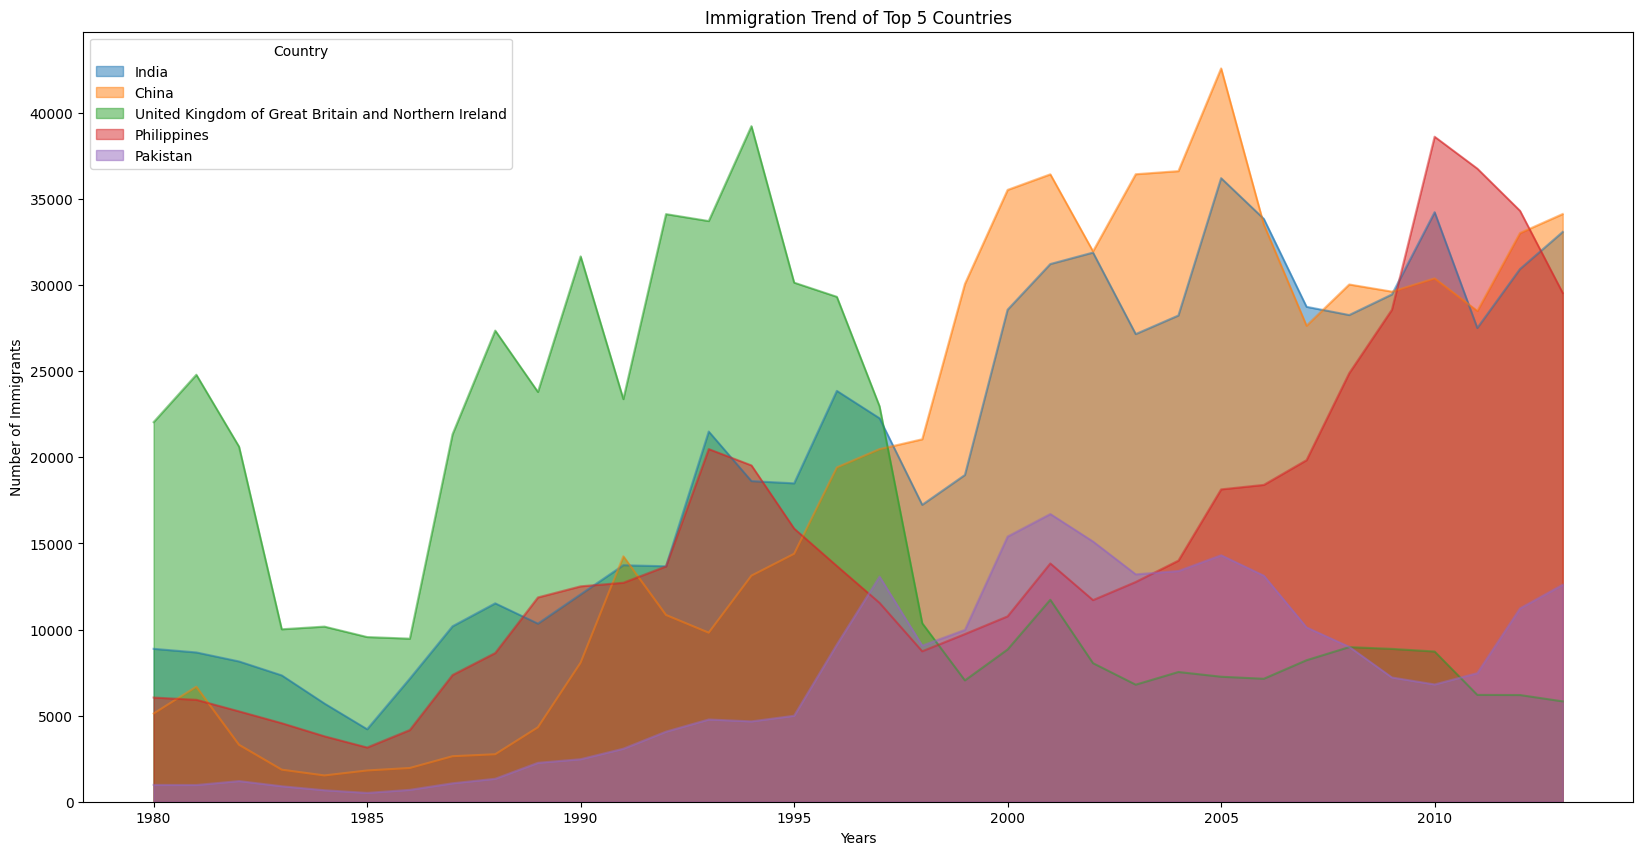

In [19]:
# showing the area plot of top 5 immigrant countries 

# Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative 
# values (any NaN, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter stacked to value False.


# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

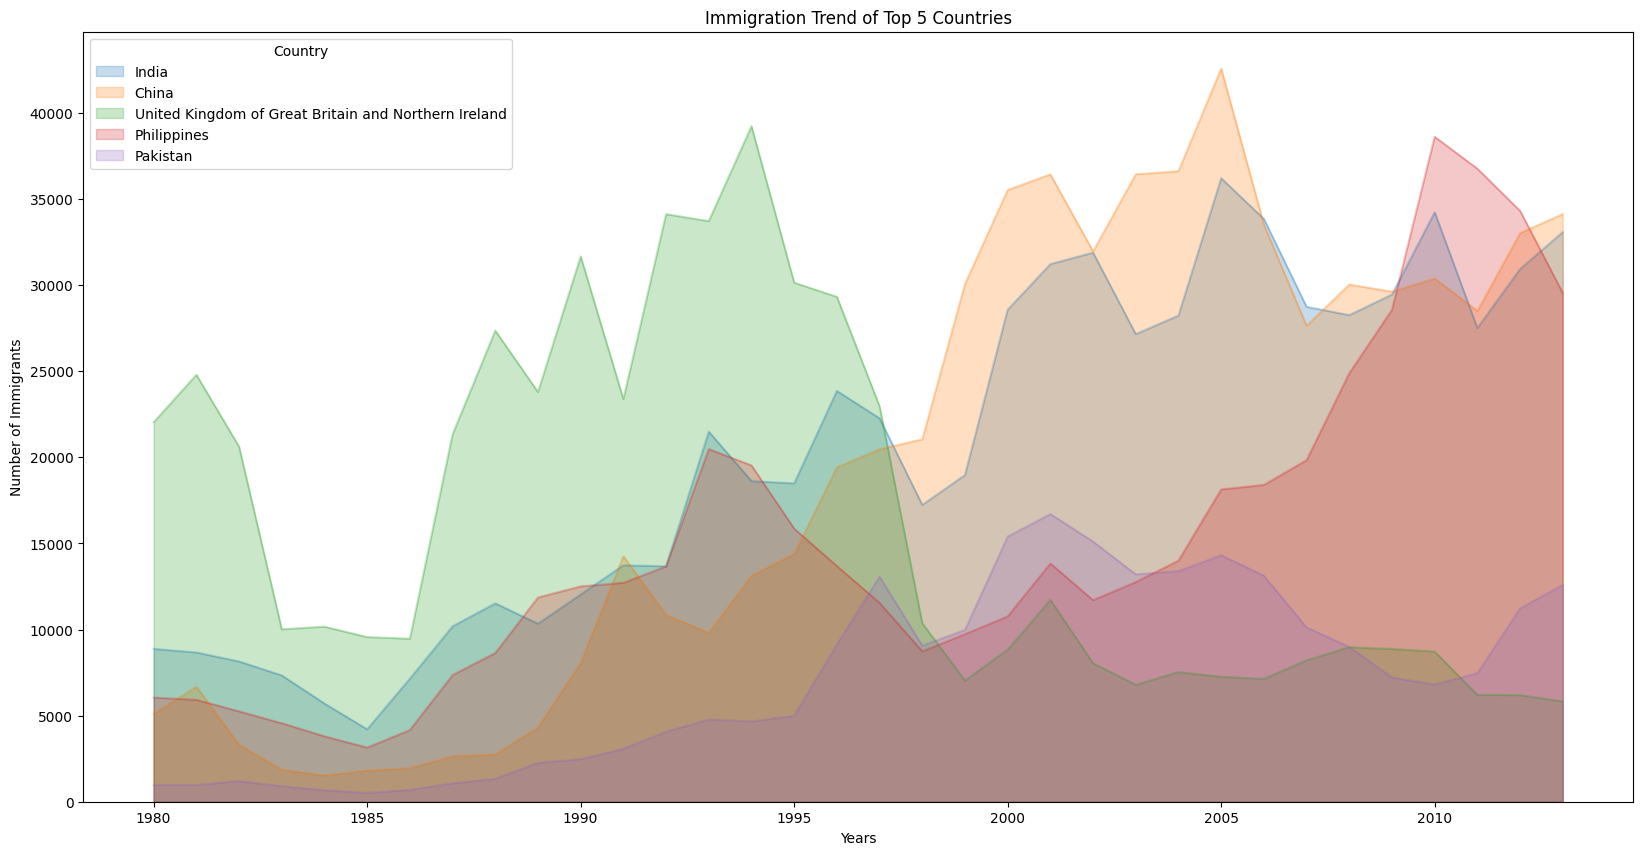

In [20]:
# The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by 
# passing in the alpha parameter.
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

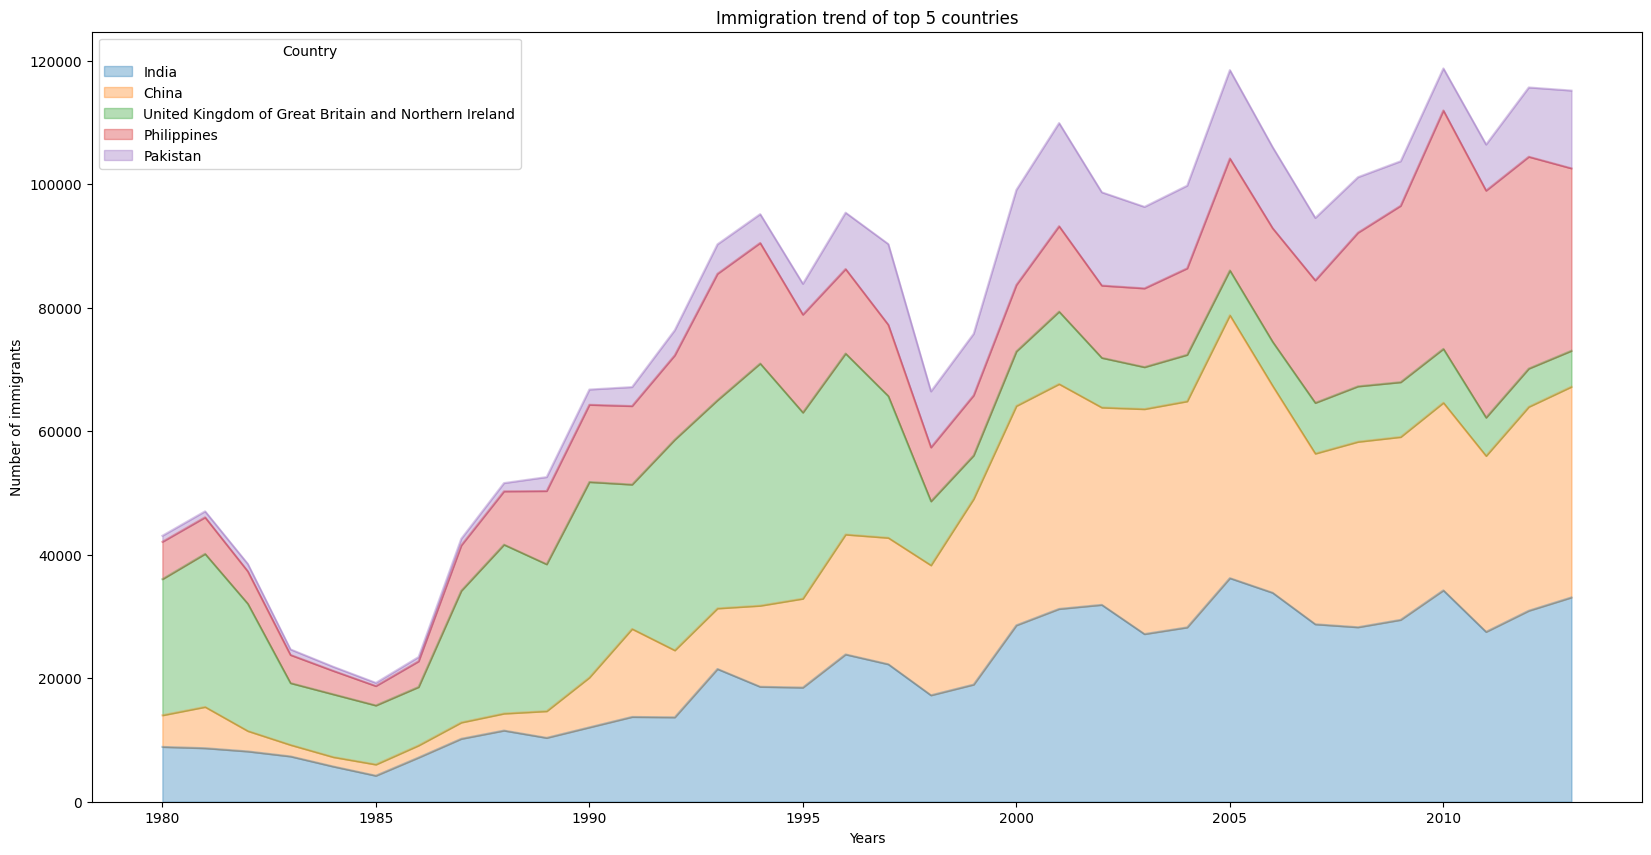

In [21]:
# Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' 
df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

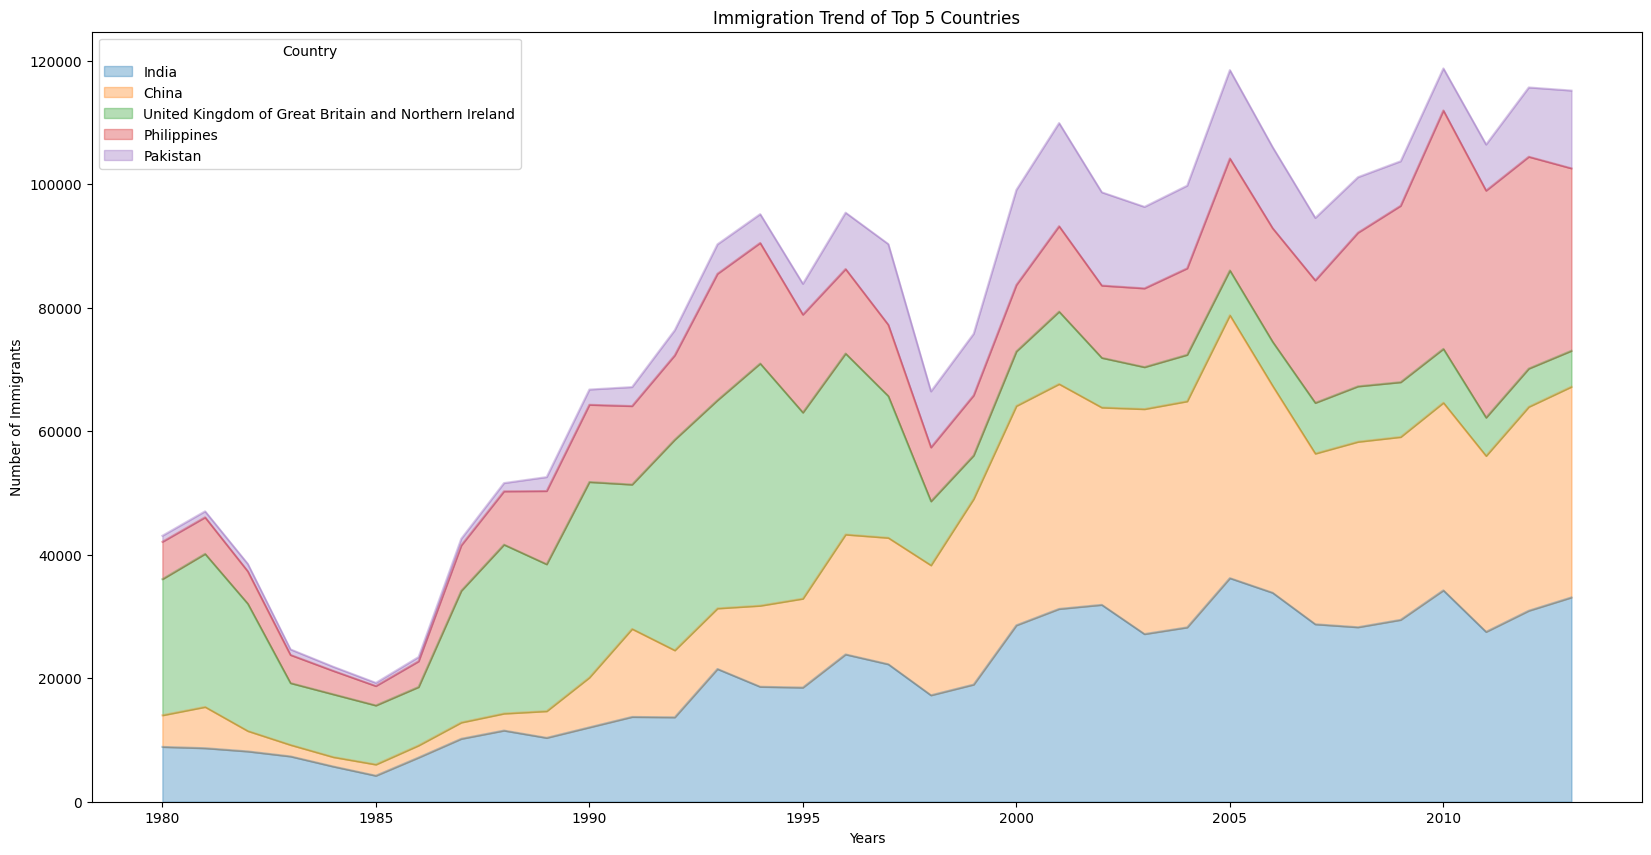

In [22]:
# plotting by using object oriented method 


# Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) **

# You can use an Axes instance of your current plot and store it in a variable (eg. ax). You can add more elements 
# by calling methods with a little change in syntax (by adding "set_" to the previous methods). For example, use ax.set_title() 
# instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.

# This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, 
# as you will see later).

# In this course, we will stick to the scripting layer, except for some advanced visualizations where we will need to use 
# the artist layer to manipulate advanced aspects of the plots.


ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

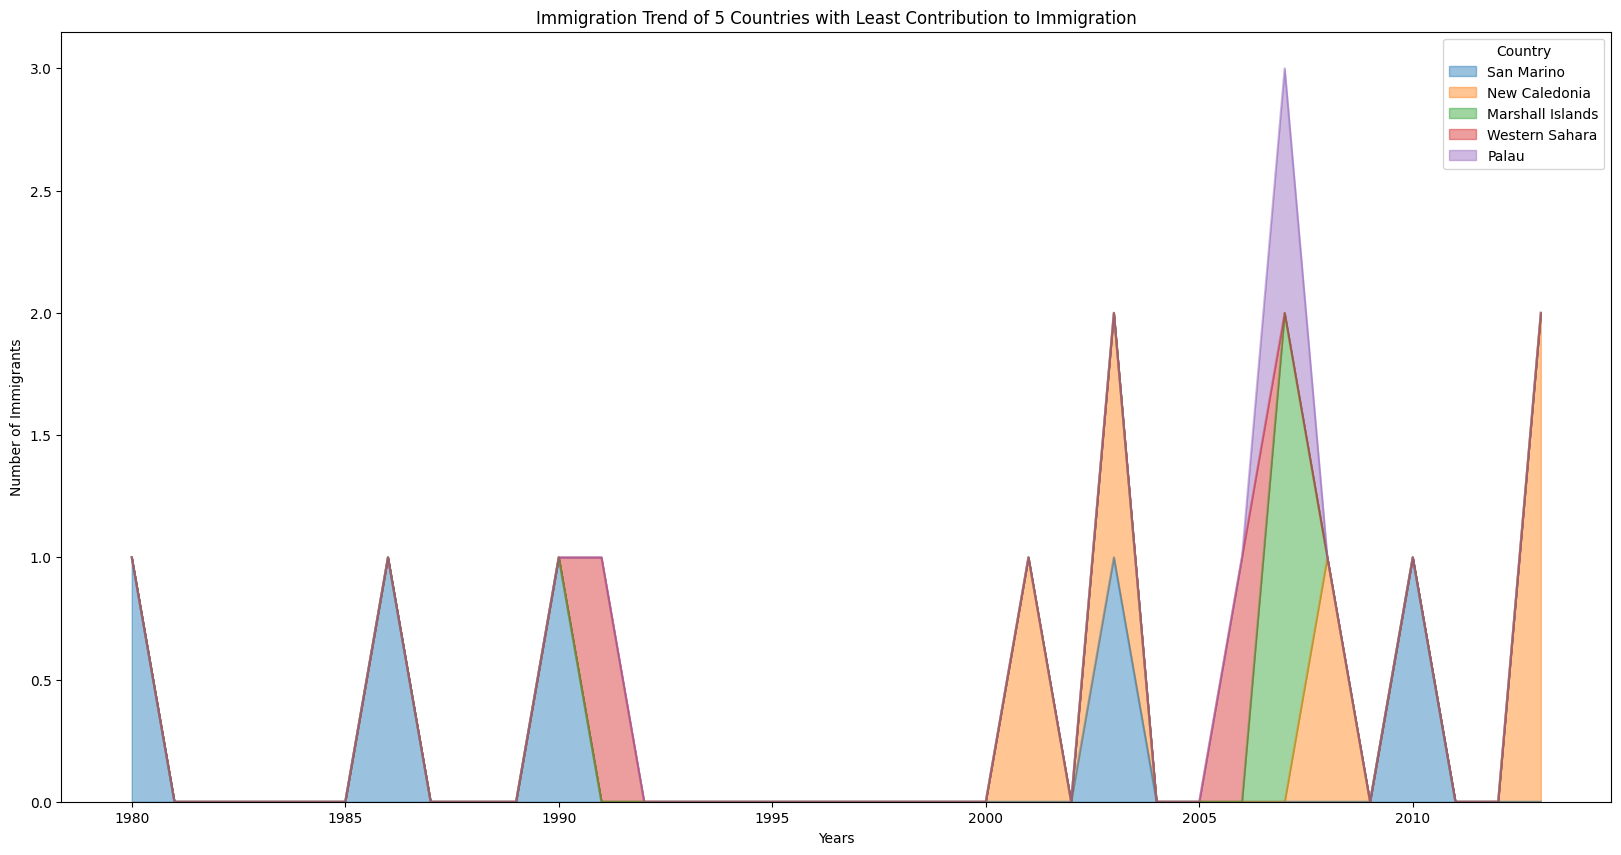

In [23]:
# Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to 
# Canada from 1980 to 2013. Use a transparency value of 0.45.

# get the 5 countries with the least contribution
df_least5 = df.tail(5)
    
# transpose the dataframe
df_least5 = df_least5[years].transpose() 
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

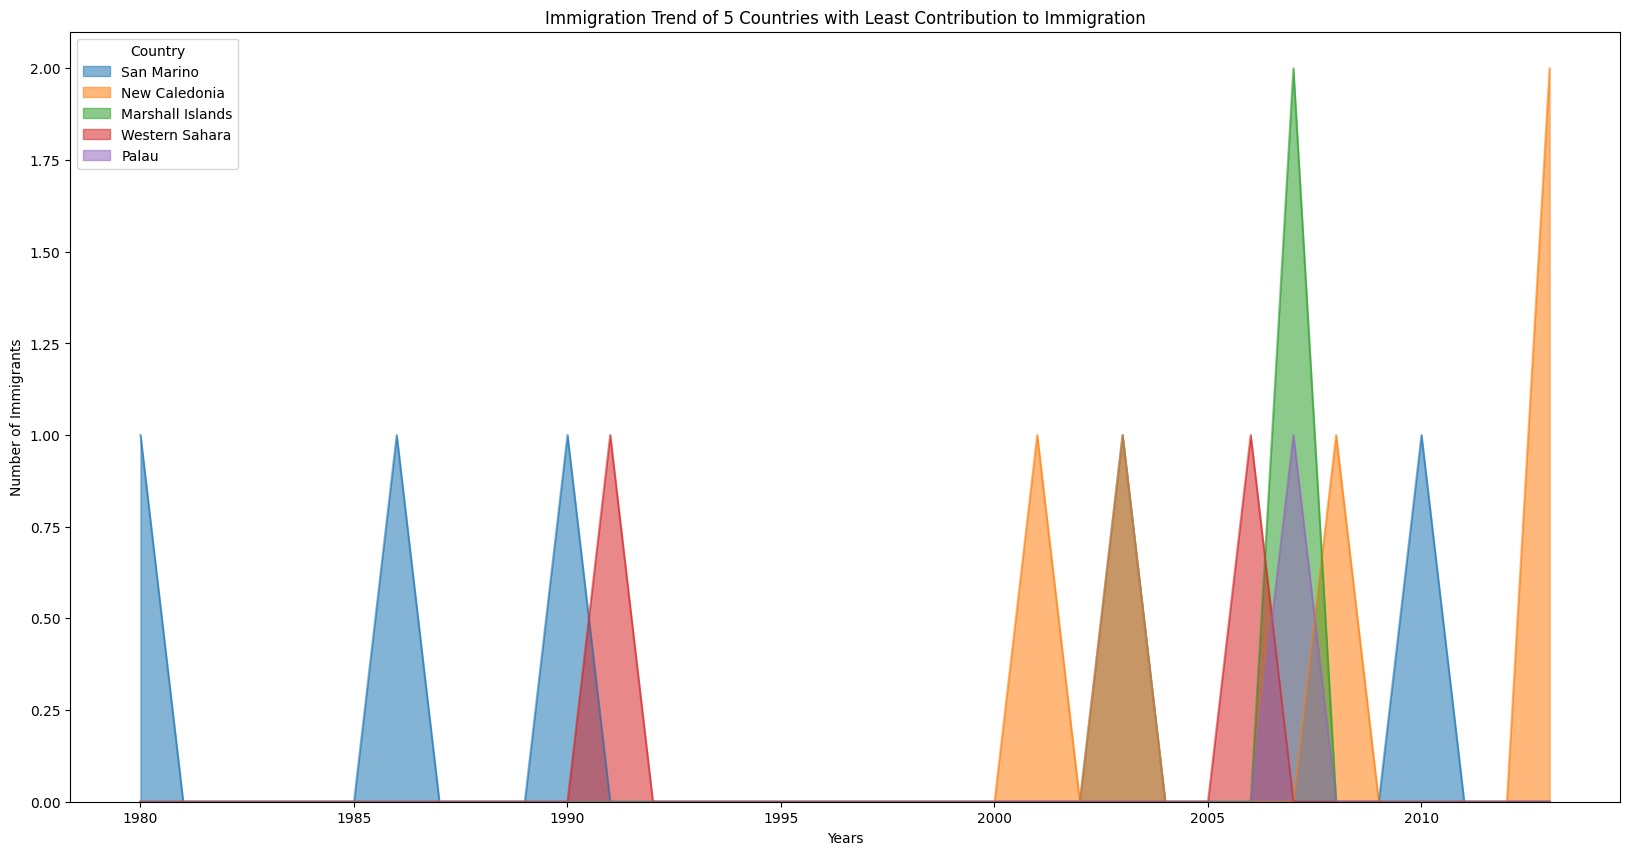

In [24]:
# Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. 
# Use a transparency value of 0.55.

# get the 5 countries with the least contribution
df_least5 = df.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose() 

df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting

ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


In [25]:
# Histogram
# A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it 
# partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number 
# of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points 
# in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is 
# displayed nicely.

In [26]:
# What is the frequency distribution of the number (population) of new immigrants from the various 
# countries to Canada in 2013?
# Before we proceed with creating the histogram plot, let's first examine the data split into intervals. 
# To do this, we will us Numpy's histrogram method to get the bin ranges and frequency counts as follows:

In [28]:
# viewing the data of 2013 
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [30]:
# performing a histogram calculation using the NumPy library 
count, bin_edges = np.histogram(df['2013'])
print(count)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


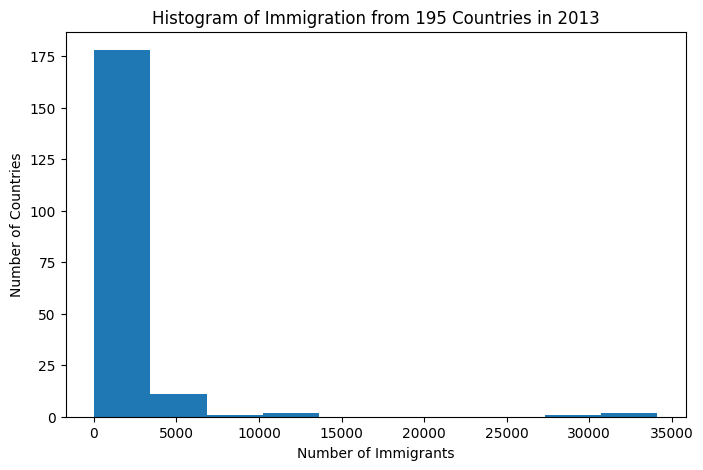

In [31]:
# showing in histogram 
df['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

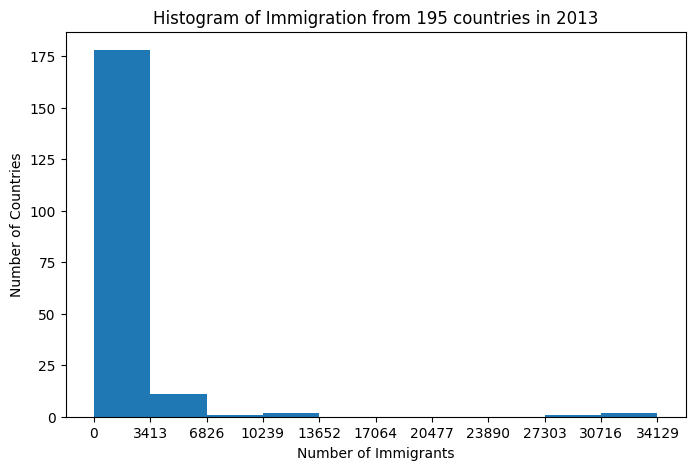

In [32]:
# matching the bin size and plotting in histogram 

# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [33]:
# plotting multiple histogram in same plot 
# What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?
# viewing the data set 
df.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot: ylabel='Frequency'>

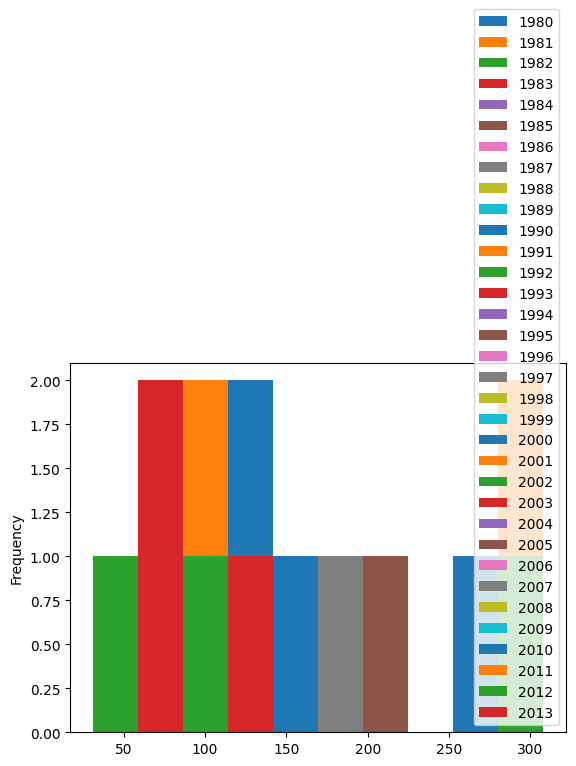

In [35]:
# generating histogram 
df.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [36]:
# plotting the population frequency distribution for the years 
# This can be easily fixed by first transposing the dataset, and then plotting as shown below.
# transpose dataframe
df_transpose= df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_transpose.head()


Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


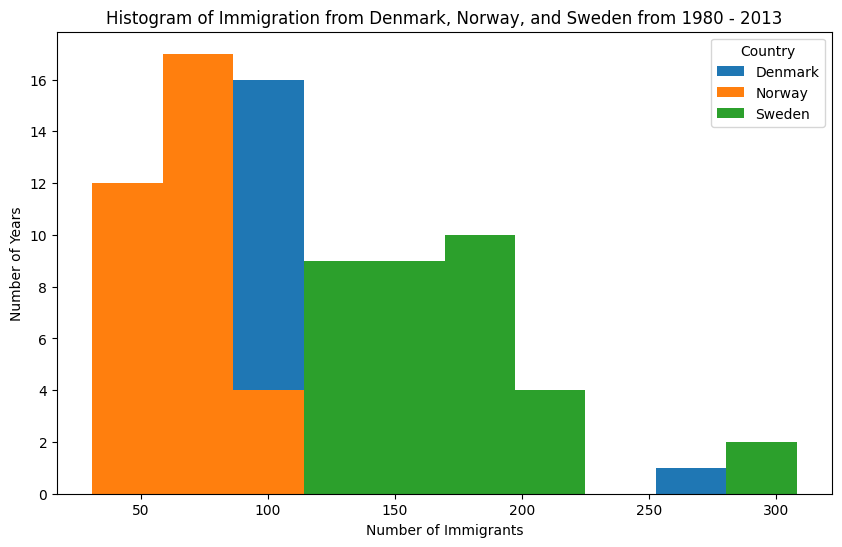

In [37]:
# generate histogram
df_transpose.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

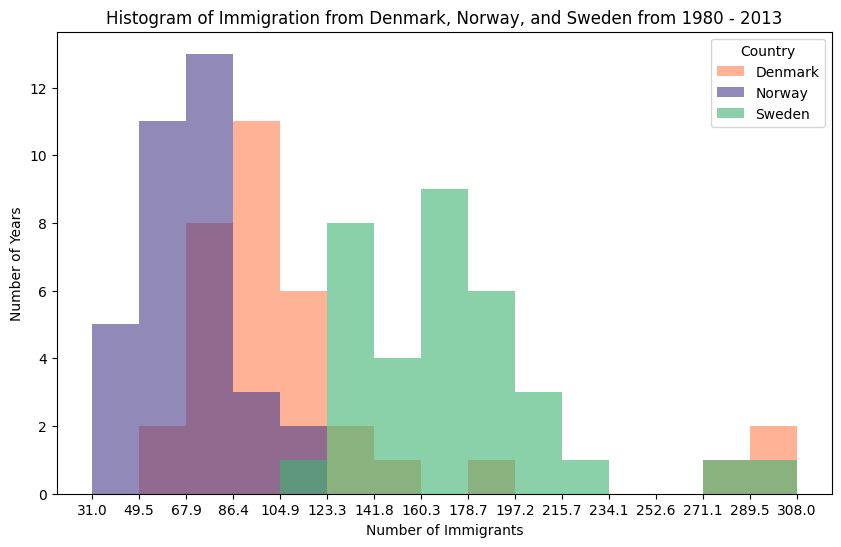

In [38]:
# making a few modifications to improve the impact and aesthetics of the previous plot
# let's get the x-tick values
count, bin_edges = np.histogram(df_transpose, 15)

# un-stacked histogram
df_transpose.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [39]:
# For a full listing of colors available in Matplotlib
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


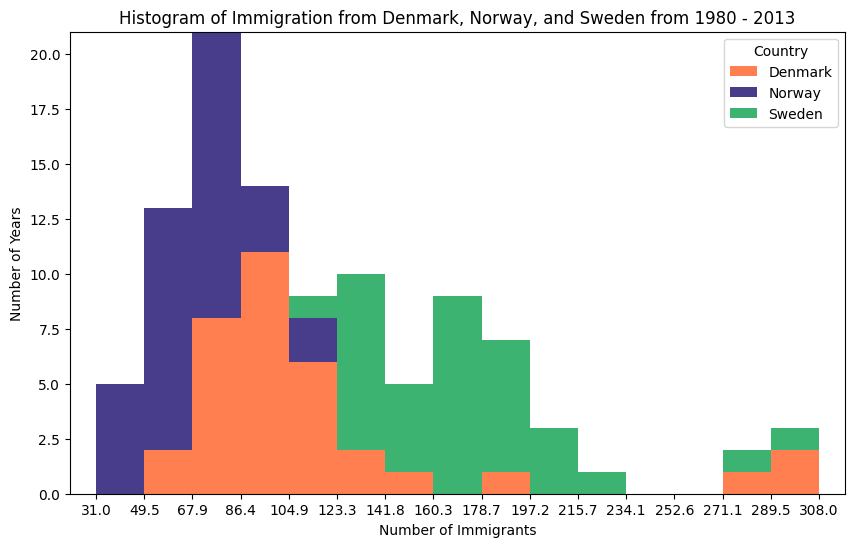

In [40]:
# If we do not want the plots to overlap each other, we can stack them using the stacked parameter. 
# Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. 
# We can pass a tuple (min,max) using the xlim paramater
count, bin_edges = np.histogram(df_transpose, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_transpose.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

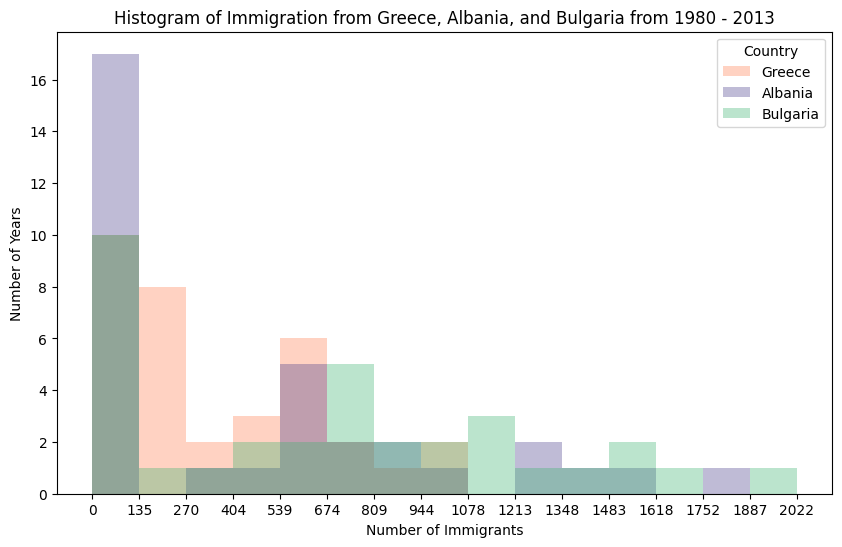

In [41]:
#  Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? 
# Use an overlapping plot with 15 bins and a transparency value of 0.35
# create a dataframe of the countries of interest (cof)
df_cof = df.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose the dataframe
df_cof = df_cof.transpose() 

# let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)

# Un-stacked Histogram
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [42]:
# Bar Charts (Dataframe) 
# A bar plot is a way of representing data where the length of the bars represents the magnitude/size 
# of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

# To create a bar plot, we can pass one of two arguments via kind parameter in plot():

# kind=bar creates a vertical bar plot
# kind=barh creates a horizontal bar plot

In [43]:
# Vertical bar plot
# In vertical bar graphs, the x-axis is used for labelling, and the length of bars on 
# the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs 
# are particularly useful in analyzing time series data. 
# One disadvantage is that they lack space for text labelling at the foot of each bar.



In [46]:
# comparing the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013
# step 1: get the data
df_iceland = df.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

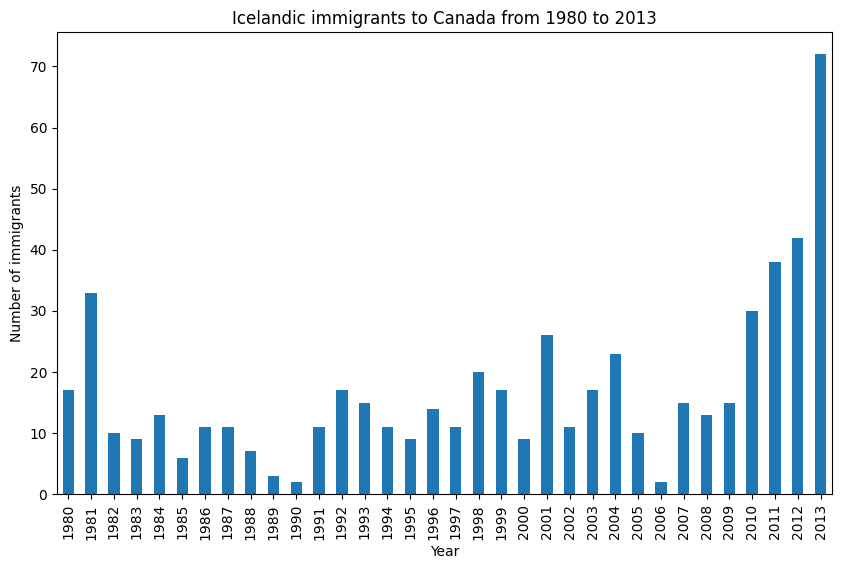

In [47]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

In [48]:
# The bar plot above shows the total number of immigrants broken down by each year. We can clearly 
# see the impact of the financial crisis; 
# the number of immigrants to Canada started increasing rapidly after 2008.

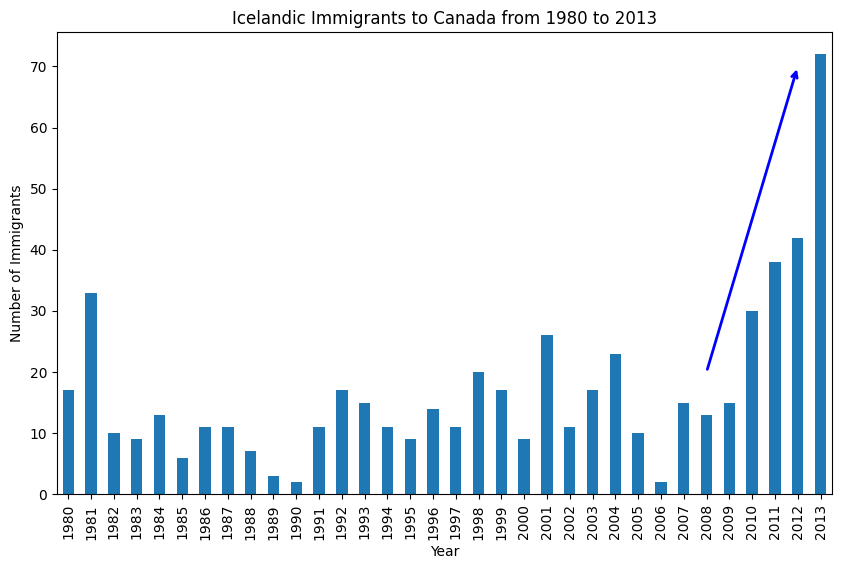

In [49]:
# Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

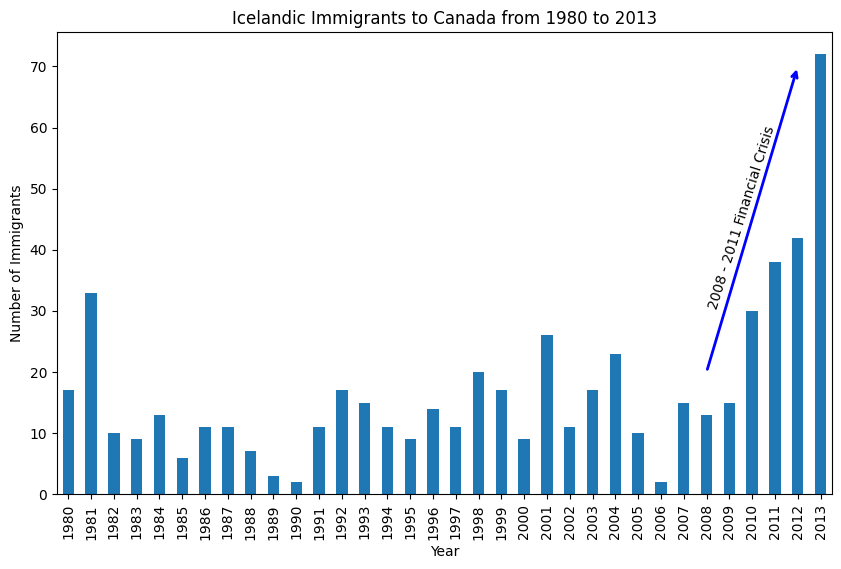

In [50]:
# Let's also annotate a text to go over the arrow. We will pass in the following additional parameters


# rotation: rotation angle of text in degrees (counter clockwise)
# va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
# ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]



df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [ ]:
# Horizontal Bar Plot

# Sometimes it is more practical to represent the data horizontally, especially if you need 
# more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, 
# and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. 
# As you will see, there is more room on the y-axis to label categorical variables.